<a href="https://colab.research.google.com/github/pranavteja/TSF_GRIP_Tasks/blob/main/GRIP_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRANAV TEJA - DATA SCIENCE AND BUSINESS ANALYTICS |
GRIP @ THE SPARKS FOUNDATION

TASK 1 - PREDICTION USING SUPERVISED ML


IMPORTING THE PREREQUISITE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING AND VIEWING THE DATA

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data import successful")

data.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


PLOTTING THE DISTRIBUTION OF DATA

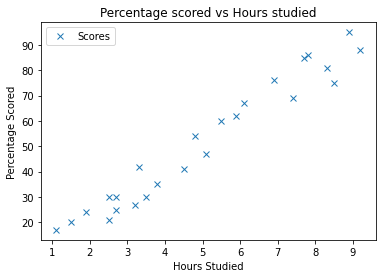

In [26]:
data.plot(x ='Hours',y='Scores',style = 'x')
plt.title('Percentage scored vs Hours studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

After looking at the graph above, we can clearly see that there is a linear relation between the hours studied and the percentage scored. Hence, linear regression would be a good choice to make our predictions.

PREPARING AND SPLITTING THE DATA INTO THE 80-20 TRAIN-TEST SPLIT 

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [28]:
X=data.iloc[:, :1].values
Y=data.iloc[:,1].values

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_predict = regressor.predict(X_test)
print(y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [32]:
newdf = pd.DataFrame(Y_test,y_predict)
newdf.head(10)

,0
16.884145,20
33.732261,27
75.357018,69
26.794801,30
60.491033,62


VISUALIZING THE PREDICTIONS AGAINST THE GIVEN DATA

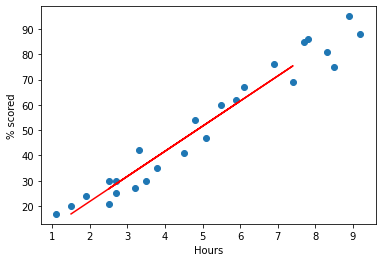

In [41]:
plt.scatter(X,Y)
plt.plot(X_test,y_predict,color = 'red')
plt.xlabel('Hours')
plt.ylabel('% scored')
plt.show()

PREDICTING THE % SCORE FOR 9.25 HOURS

In [48]:
pred = regressor.predict([[9.25]])
print("The predicted score is",pred)

The predicted score is [93.69173249]


UNDERSTANDING THE ACCURACY OF OUR PREDICTION

In [44]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean squared error:",metrics.mean_absolute_error(Y_test,y_predict))
R2=metrics.r2_score(Y_test,y_predict)
print(R2)
accuracy=R2*100;
print("Accuracy of the model is",accuracy)

Mean squared error: 4.183859899002982
0.9454906892105354
Accuracy of the model is 94.54906892105353
